### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="whitegrid")

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [29]:
data = pd.read_csv('data/coupons.csv')

In [68]:
data.head(1)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_numeric
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,1,21.0


2. Investigate the dataset for missing or problematic data.

In [31]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [32]:
data['Y'].value_counts(normalize=True)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

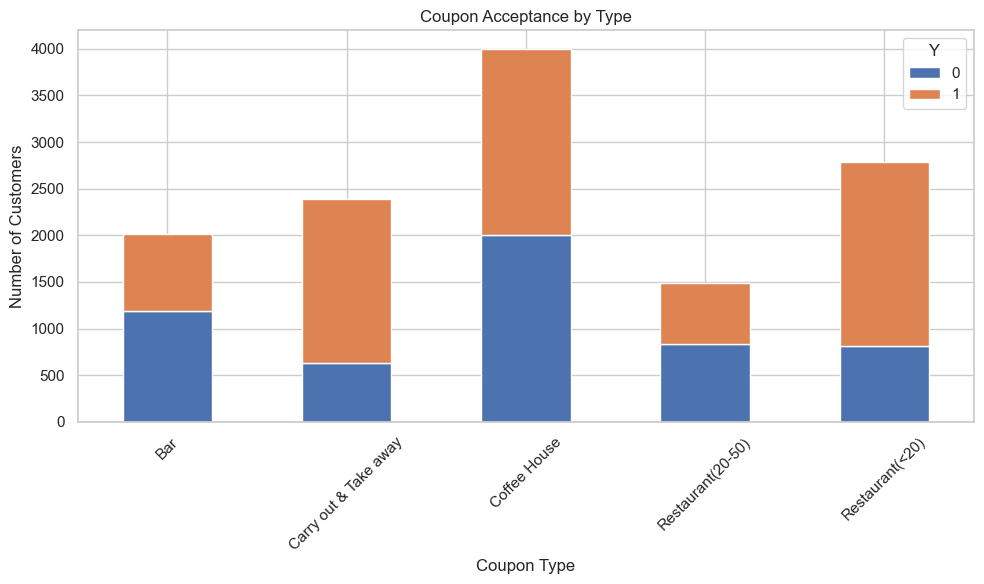

In [33]:
coupon_plot = data.groupby(['coupon', 'Y']).size().unstack().fillna(0)
coupon_plot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Coupon Acceptance by Type')
plt.ylabel('Number of Customers')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('images/coupon_acceptance_by_type.png')

6. Use a histogram to visualize the temperature column.

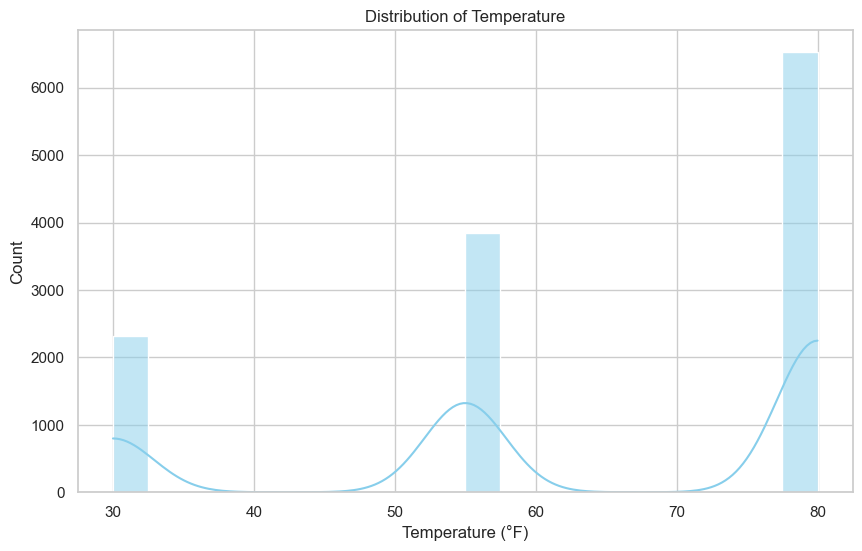

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.savefig('images/distributionoftemperature.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [46]:
bar_coupon_data=data.loc[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [48]:
bar_coupon_data['Y'].mean()

np.float64(0.41001487357461575)

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [54]:

# Group individuals based on bar visit frequency
group_3_or_fewer = bar_coupon_data.loc[bar_coupon_data['Bar'].isin(['never', 'less1', '1~3'])]
group_more_than_3 = bar_coupon_data.loc[bar_coupon_data['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates
acceptance_3_or_fewer = group_3_or_fewer['Y'].mean()
acceptance_more_than_3 = group_more_than_3['Y'].mean()

#Print result
print(acceptance_3_or_fewer)
print(acceptance_more_than_3)



0.37061769616026713
0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [71]:
#Convert Age to Numeric
data['age_numeric'] = pd.to_numeric(data['age'], errors='coerce')

# Group drivers based on bar visit frequency and age
group_1_or_fewer = bar_coupon_data[bar_coupon_data['Bar'].isin(['never', 'less1']) & (bar_coupon_data['age_numeric']>25)]
group_more_than_1 = bar_coupon_data[bar_coupon_data['Bar'].isin(['1~3','4~8', 'gt8']) & (bar_coupon_data['age_numeric']>25)]

# Calculate acceptance rates
acceptance_1_or_fewer = group_1_or_fewer['Y'].mean()
acceptance_more_than_1 = group_more_than_1['Y'].mean()

#Print result
print(acceptance_1_or_fewer)
print(acceptance_more_than_1)

0.2817229336437718
0.6997167138810199


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [73]:
# Group drivers based on Passenger and Occupation
group_1 = bar_coupon_data[bar_coupon_data['Bar'].isin(['never', 'less1']) & (~bar_coupon_data['occupation'].isin(['farming','fishing','forestry']))]
group_2 = bar_coupon_data[bar_coupon_data['Bar'].isin(['1~3','4~8', 'gt8']) & (bar_coupon_data['has_children'] == 1)]

# Calculate acceptance rates
acceptance_group_1 = group_1['Y'].mean()
acceptance_group_2 = group_2['Y'].mean()

#Print result
print(acceptance_group_1)
print(acceptance_group_2)

0.29214285714285715
0.6555555555555556


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



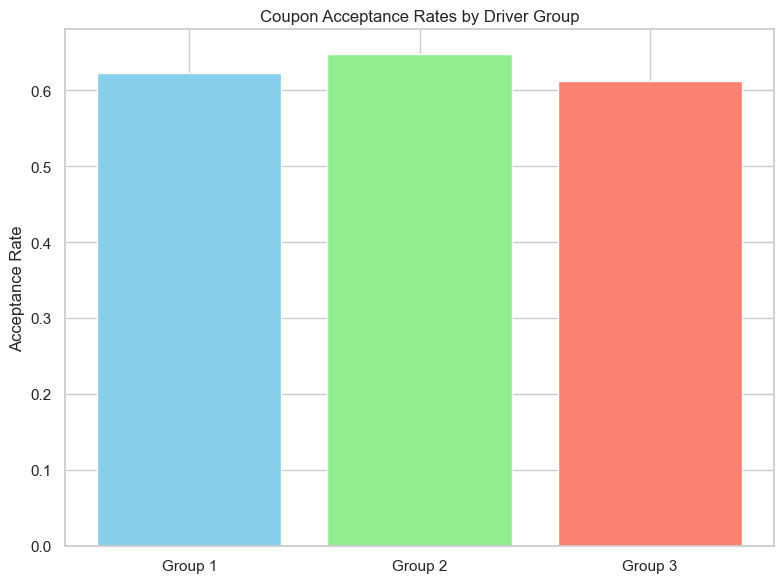

In [76]:
# Convert age to numeric where possible
data['age_numeric'] = pd.to_numeric(data['age'], errors='coerce')

# Group 1: go to bars more than once/month, not with kids, not widowed
group1 = data[
    data['Bar'].isin(['4~8', 'gt8']) &
    (data['passanger'] != 'Kid(s)') &
    (data['maritalStatus'] != 'Widowed')
]

# Group 2: go to bars more than once/month and under age 30
group2 = data[
    data['Bar'].isin(['4~8', 'gt8']) &
    (data['age_numeric'] < 30)
]

# Group 3: go to cheap restaurants more than 4 times/month and income < $50K
income_filter = [
    '$24999', '$20000 - $24999', '$25000 - $37499', '$37500 - $49999',
    'Less than $10000', '$10000 - $12499', '$12500 - $14999',
    '$15000 - $17499', '$17500 - $19999'
]
group3 = data[
    data['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
    data['income'].isin(income_filter)
]

# Calculate acceptance rates
acceptance_rates = {
    'Group 1': group1['Y'].mean(),
    'Group 2': group2['Y'].mean(),
    'Group 3': group3['Y'].mean()
}

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(acceptance_rates.keys(), acceptance_rates.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Acceptance Rate')
plt.title('Coupon Acceptance Rates by Driver Group')
plt.tight_layout()
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Drivers who frequently visit bars, are socially active when not accompanied by kids, they are younger, and who have moderate to lower income levels are more likely to accept Bar coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

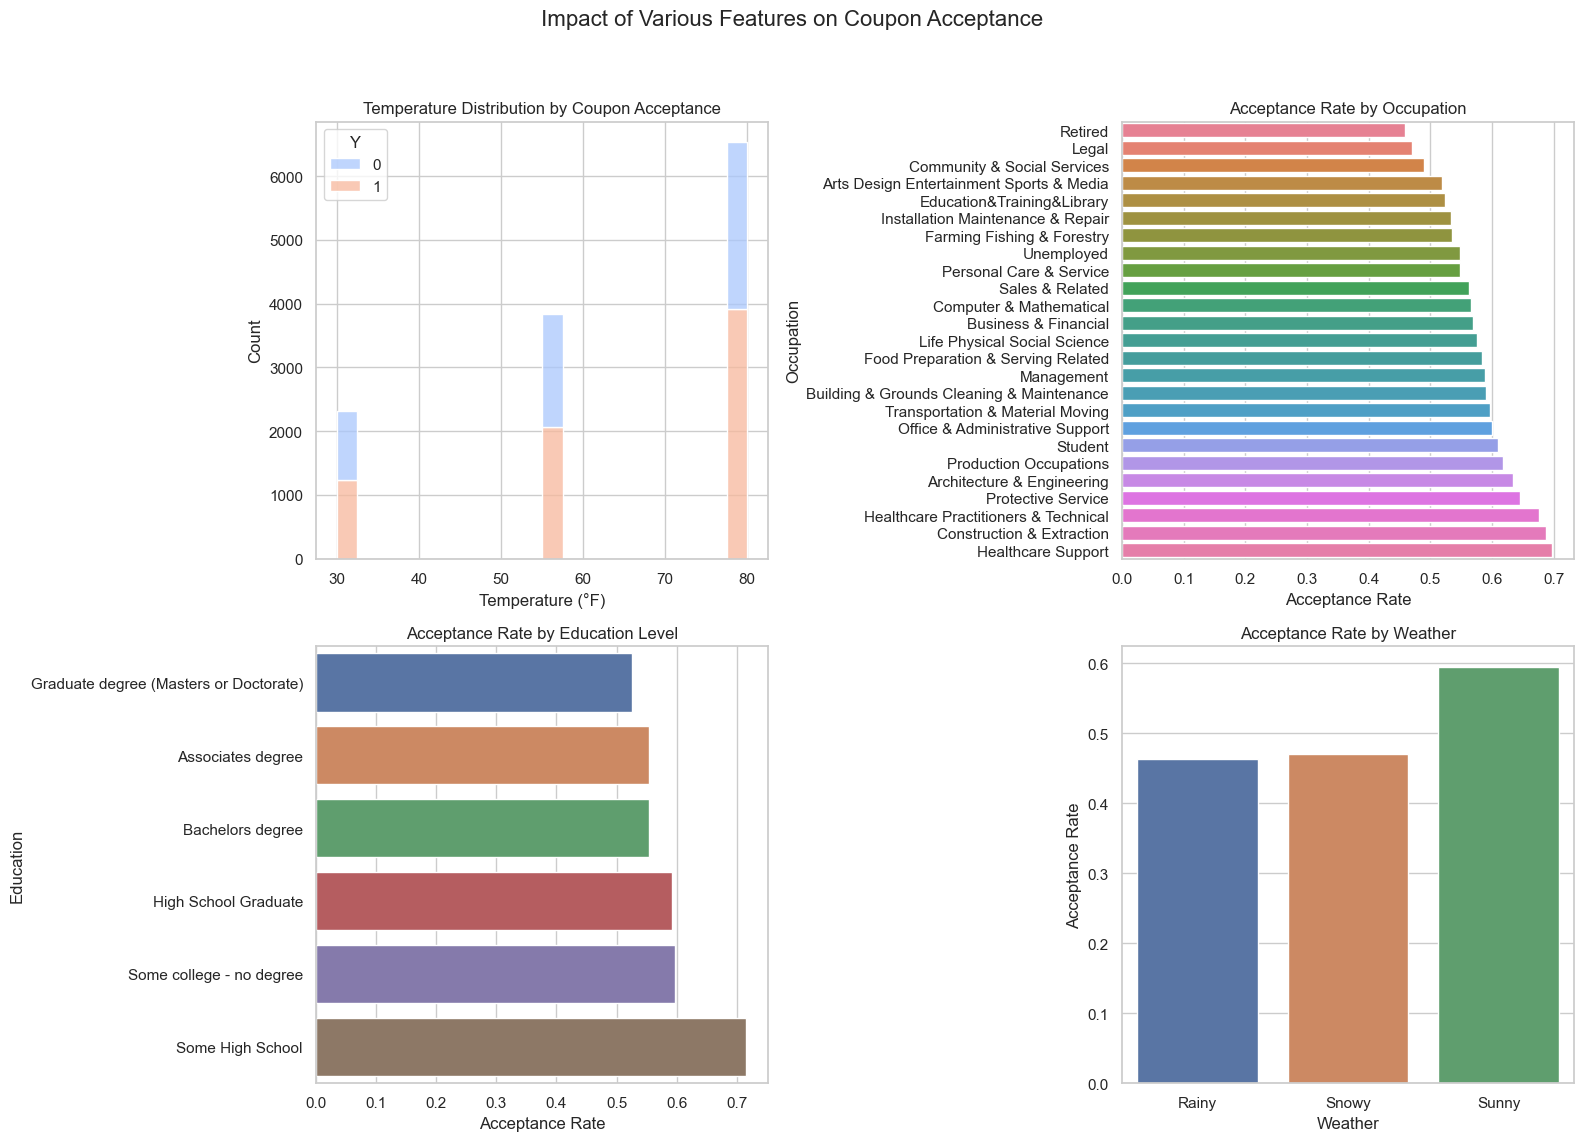

In [80]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Impact of Various Features on Coupon Acceptance', fontsize=16)

# Subplot 1: Temperature distribution by coupon acceptance
sns.histplot(data=data, x='temperature', hue='Y', multiple='stack', bins=20, ax=axes[0, 0], palette='coolwarm')
axes[0, 0].set_title('Temperature Distribution by Coupon Acceptance')
axes[0, 0].set_xlabel('Temperature (°F)')
axes[0, 0].set_ylabel('Count')

# Subplot 2: Occupation vs. Acceptance Rate
occupation_acceptance = data.groupby('occupation')['Y'].mean().sort_values()
occupation_df = occupation_acceptance.reset_index()
sns.barplot(data=occupation_df, x='Y', y='occupation', hue='occupation', dodge=False, ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Acceptance Rate by Occupation')
axes[0, 1].set_xlabel('Acceptance Rate')
axes[0, 1].set_ylabel('Occupation')

# Subplot 3: Education vs. Acceptance Rate
education_acceptance = data.groupby('education')['Y'].mean().sort_values()
education_df = education_acceptance.reset_index()
sns.barplot(data=education_df, x='Y', y='education', hue='education', dodge=False, ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Acceptance Rate by Education Level')
axes[1, 0].set_xlabel('Acceptance Rate')
axes[1, 0].set_ylabel('Education')

# Subplot 4: Weather vs. Acceptance Rate
weather_acceptance = data.groupby('weather')['Y'].mean().sort_values()
weather_df = weather_acceptance.reset_index()
sns.barplot(data=weather_df, x='weather', y='Y', hue='weather', dodge=False, ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Acceptance Rate by Weather')
axes[1, 1].set_xlabel('Weather')
axes[1, 1].set_ylabel('Acceptance Rate')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
Acceptance by Coupon Type

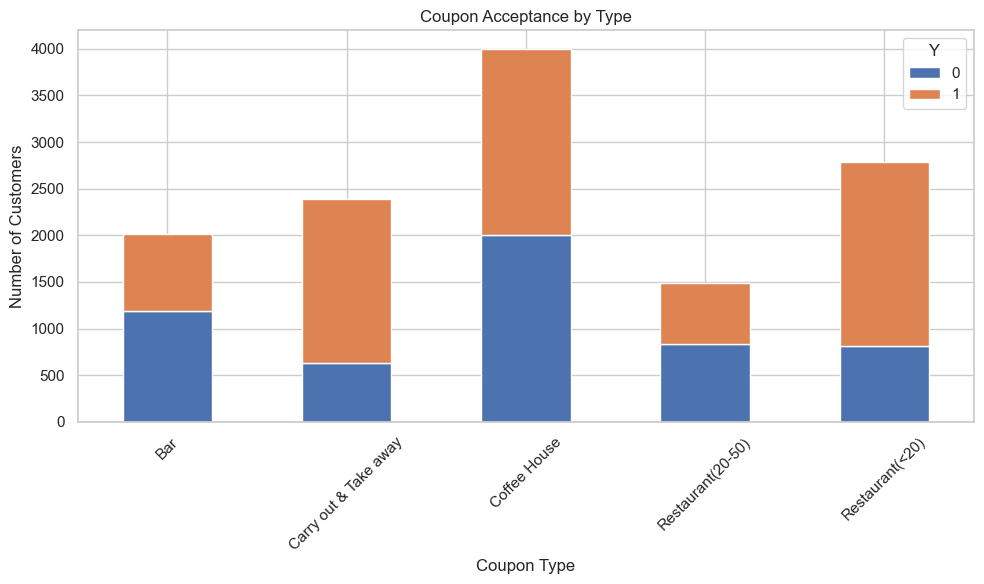

In [85]:
coupon_plot=data.groupby(['coupon', 'Y']).size().unstack().fillna(0)
coupon_plot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Coupon Acceptance by Type')
plt.ylabel('Number of Customers')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Acceptance by Time of Day

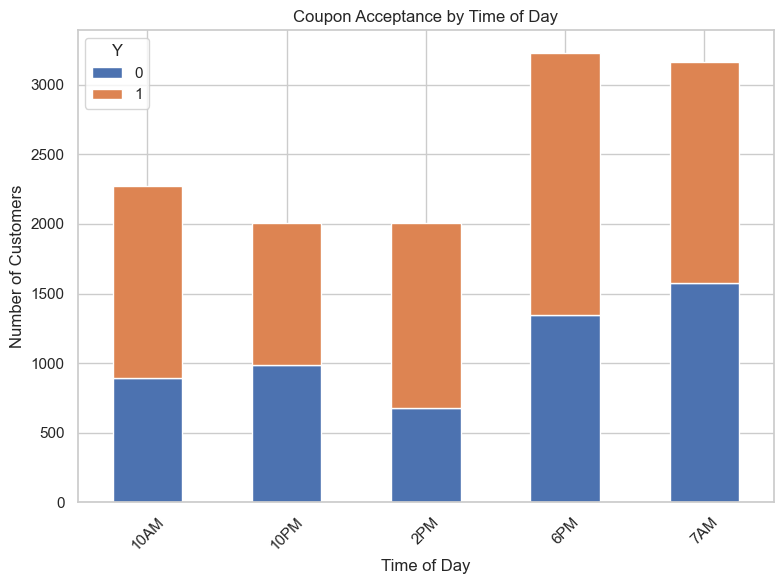

<Figure size 640x480 with 0 Axes>

In [91]:
time_plot=data.groupby(['time', 'Y']).size().unstack().fillna(0)
time_plot.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Coupon Acceptance by Time of Day')
plt.ylabel('Number of Customers')
plt.xlabel('Time of Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('images/coupon_acceptance_by_time.png')

In [ ]:
Acceptance by Passenger

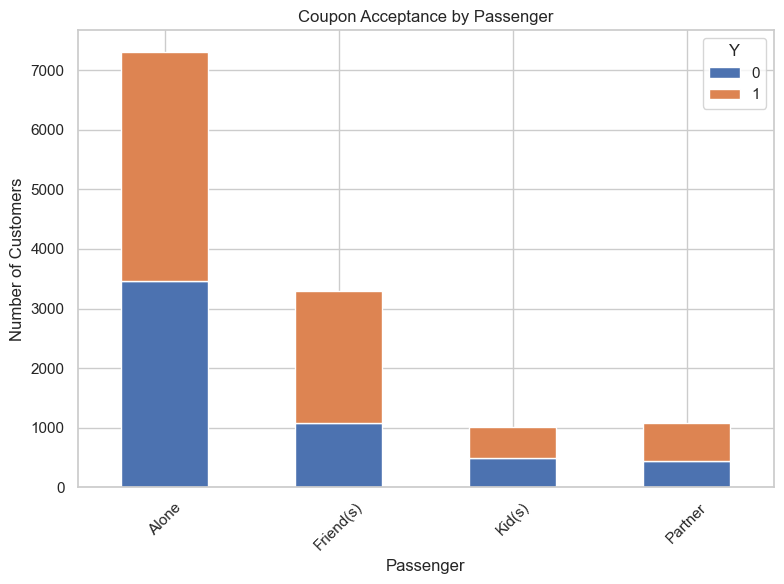

<Figure size 640x480 with 0 Axes>

In [92]:
passenger_plot=data.groupby(['passanger', 'Y']).size().unstack().fillna(0)
passenger_plot.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Coupon Acceptance by Passenger')
plt.ylabel('Number of Customers')
plt.xlabel('Passenger')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('images/coupon_acceptance_by_passenger.png')

In [ ]:
Acceptance by Destination

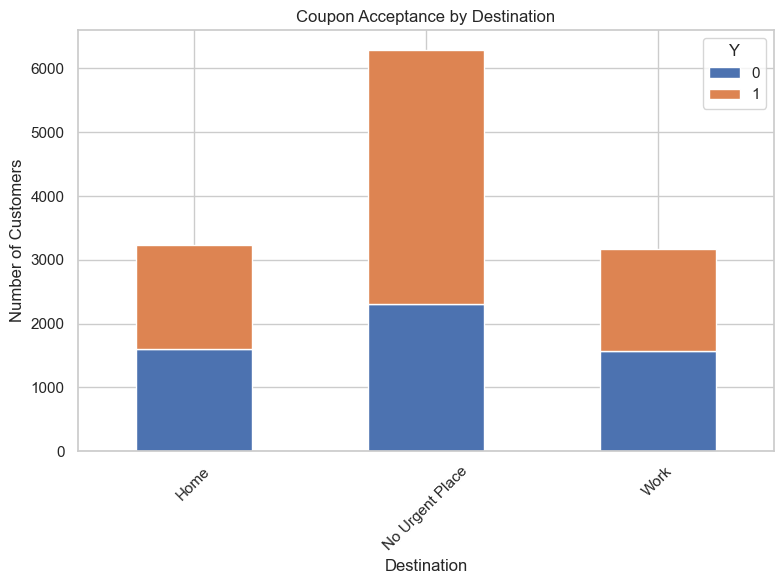

<Figure size 640x480 with 0 Axes>

In [93]:
destination_plot = data.groupby(['destination', 'Y']).size().unstack().fillna(0)
destination_plot.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Coupon Acceptance by Destination')
plt.ylabel('Number of Customers')
plt.xlabel('Destination')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('images/coupon_acceptance_by_destination.png')

In [ ]:
Key Findings and Recommendations

Coupon Type: Coffee House and Restaurant(<20) coupons had higher acceptance rates.
Time of Day: Morning and afternoon times showed higher acceptance.
Passenger Influence: Traveling alone or with a partner increased likelihood of acceptance.
Destination Impact: Coupons were more accepted when heading to home or work.

Recommendations
Focus on promoting Coffee House and Restaurant(<20) coupons.
Target morning and afternoon time slots for coupon distribution.
Personalize offers based on passenger type.
Use destination data to tailor coupon types